# Preprocesamiento de texto y frecuencias por carácter

Este notebook:
1. Lee uno o varios archivos `.txt`.
2. Normaliza el texto: minúsculas, quita acentos, elimina caracteres específicos, y reemplaza tabulaciones/saltos de línea por espacios.
3. Calcula **frecuencias a nivel de carácter**.
4. Genera **histogramas** (barras) ordenando los caracteres por frecuencia (descendente).

> Nota: Las gráficas se hacen con `matplotlib` (sin estilos/colores personalizados).


In [1]:
# Imports
from pathlib import Path
import unicodedata
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt


## Configuración de entrada

- `BASE_DIR`: carpeta donde están los `.txt`.
- `FILES`: lista de archivos a procesar.

Por tu requerimiento, se incluyen por defecto:
- `text_1.txt` a `text_5.txt`
- `libro_1.txt` y `libro_2.txt`

Si quieres correrlo con **un solo archivo**, deja `FILES = ["mi_archivo.txt"]`.


In [4]:
# === Configura aquí ===
BASE_DIR = Path("/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analisis_de_algoritmos/data")  # cambia a la carpeta donde están tus txt (ej: Path("/ruta/a/txts"))
FILES = [f"text_{i}.txt" for i in range(1, 6)] + [f"libro_{i}.txt" for i in range(1, 3)]
# Ejemplo para un solo archivo:
# FILES = ["text_1.txt"]

# Validación rápida
paths = [BASE_DIR / f for f in FILES]
missing = [str(p) for p in paths if not p.exists()]
if missing:
    print("⚠️ Archivos no encontrados (revisa BASE_DIR o nombres):")
    for m in missing:
        print(" -", m)
else:
    print("✅ Todos los archivos existen.")


✅ Todos los archivos existen.


## Definición de limpieza

Requerimiento:
- Convertir a **minúsculas**
- **Quitar acentos**
- Quitar los siguientes caracteres (se eliminan del texto):

`“;:,.\-"‘/()[]¿?¡!{}~<>|«»-—’”`

- Reemplazar **tabulaciones** y **saltos de línea** por un espacio.


In [5]:
# Caracteres a eliminar (tal cual tu lista)
CHARS_TO_REMOVE = "“;:,.\\-\"'‘/()[]¿?¡!{}~<>|«»-—’”"

# Tabla de traducción para eliminar caracteres
REMOVE_TRANSLATION = str.maketrans({c: "" for c in CHARS_TO_REMOVE})

def strip_accents(s: str) -> str:
    """Quita acentos usando normalización Unicode (NFD) y descartando marcas diacríticas."""
    return "".join(
        ch for ch in unicodedata.normalize("NFD", s)
        if unicodedata.category(ch) != "Mn"
    )

def preprocess_text(text: str) -> str:
    """
    - minúsculas
    - quita acentos
    - reemplaza tabs y saltos de línea por espacio
    - elimina caracteres específicos
    - colapsa múltiples espacios (recomendado)
    """
    text = text.lower()
    text = strip_accents(text)
    text = text.replace("\t", " ").replace("\r", " ").replace("\n", " ")
    text = text.translate(REMOVE_TRANSLATION)
    # colapsar espacios repetidos (para que el conteo de espacios sea más interpretable)
    text = " ".join(text.split())
    return text


## Lectura, preprocesamiento, conteo y visualización

Para cada archivo:
- Cargamos texto (UTF-8 con fallback).
- Preprocesamos.
- Calculamos frecuencias por carácter.
- Graficamos histograma ordenado por frecuencia (descendente).

**Tip:** si el archivo es grande, puedes limitar el número de barras con `TOP_N` para que la gráfica sea legible.



=== text_1.txt ===
Total caracteres (post-proc): 5,151
Únicos: 19


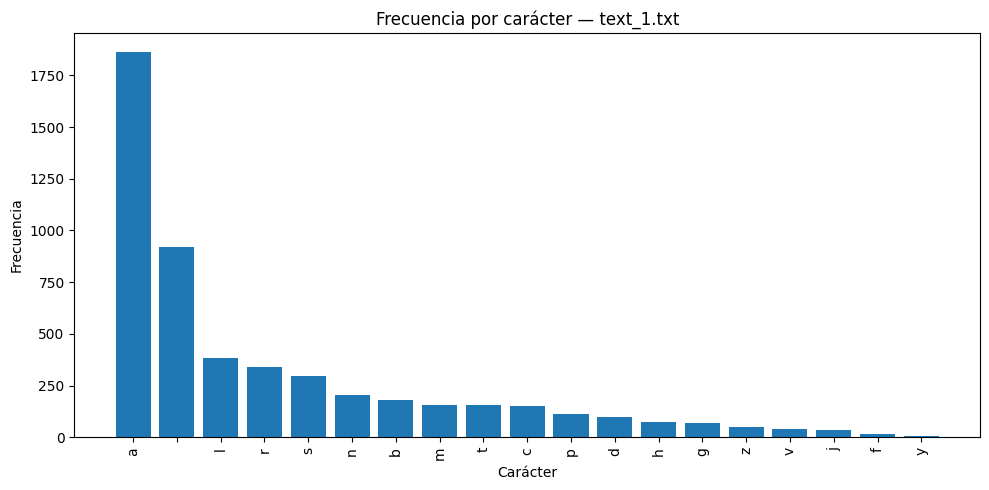


=== text_2.txt ===
Total caracteres (post-proc): 3,879
Únicos: 21


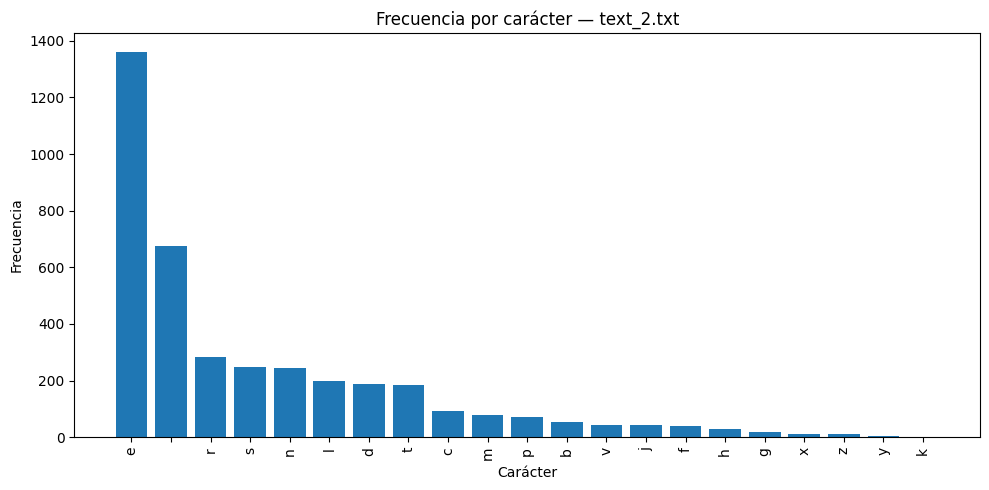


=== text_3.txt ===
Total caracteres (post-proc): 1,677
Únicos: 20


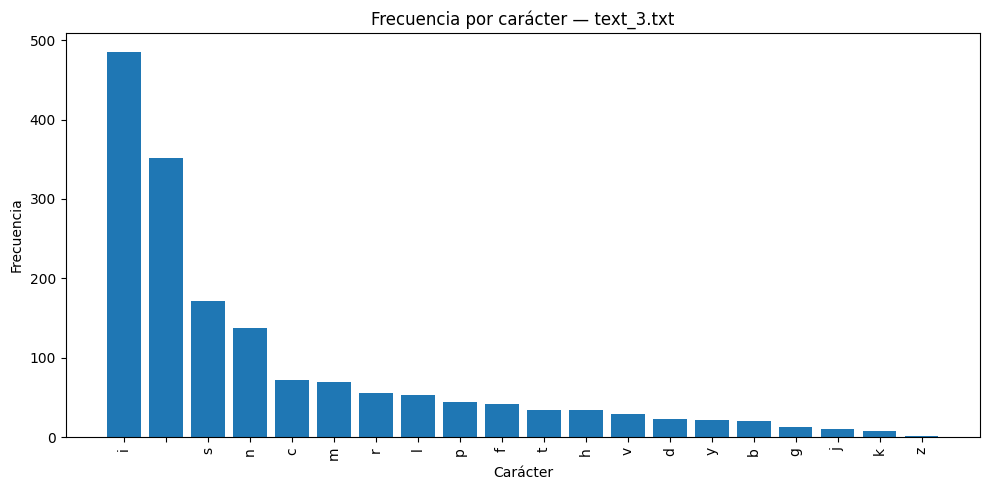


=== text_4.txt ===
Total caracteres (post-proc): 3,600
Únicos: 21


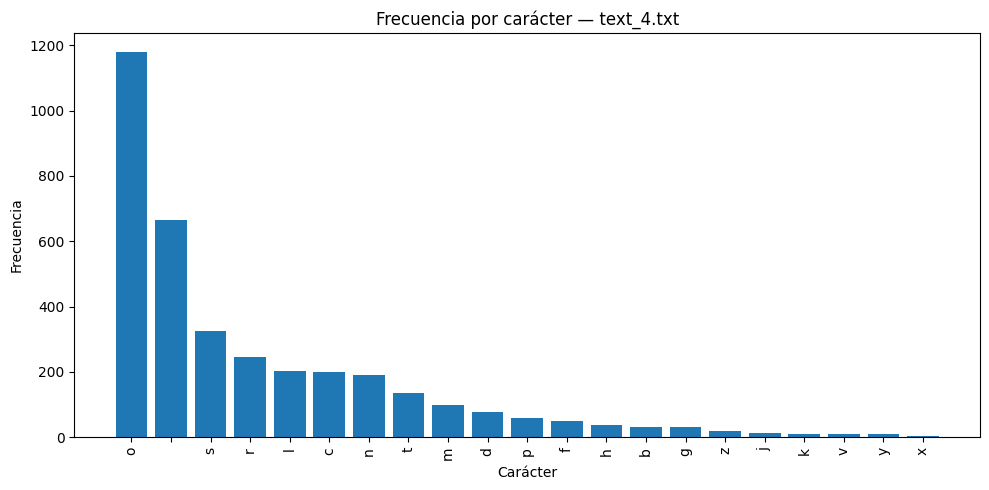


=== text_5.txt ===
Total caracteres (post-proc): 1,647
Únicos: 22


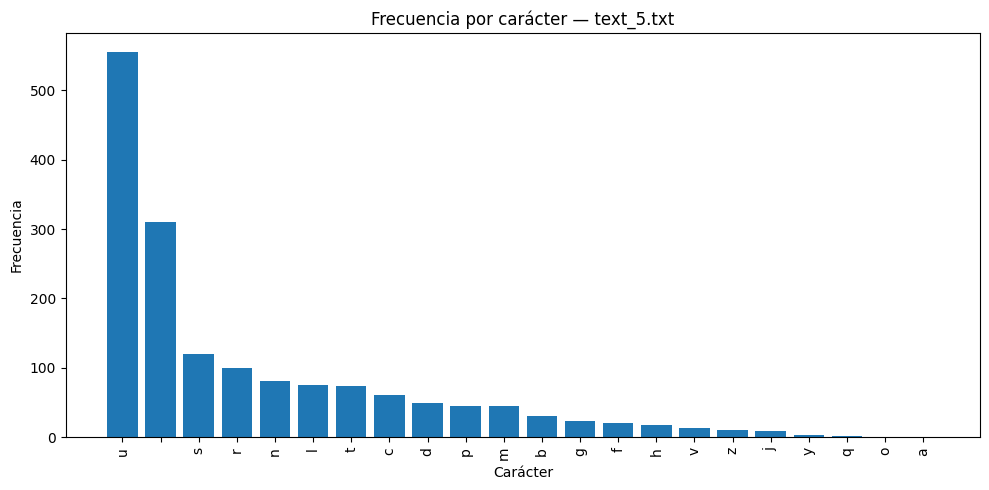


=== libro_1.txt ===
Total caracteres (post-proc): 297,799
Únicos: 38


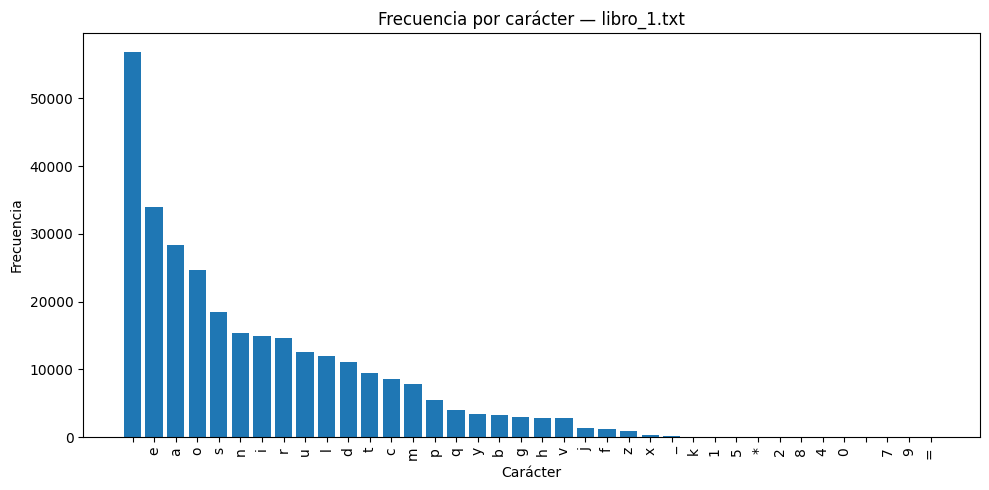


=== libro_2.txt ===
Total caracteres (post-proc): 278,435
Únicos: 35


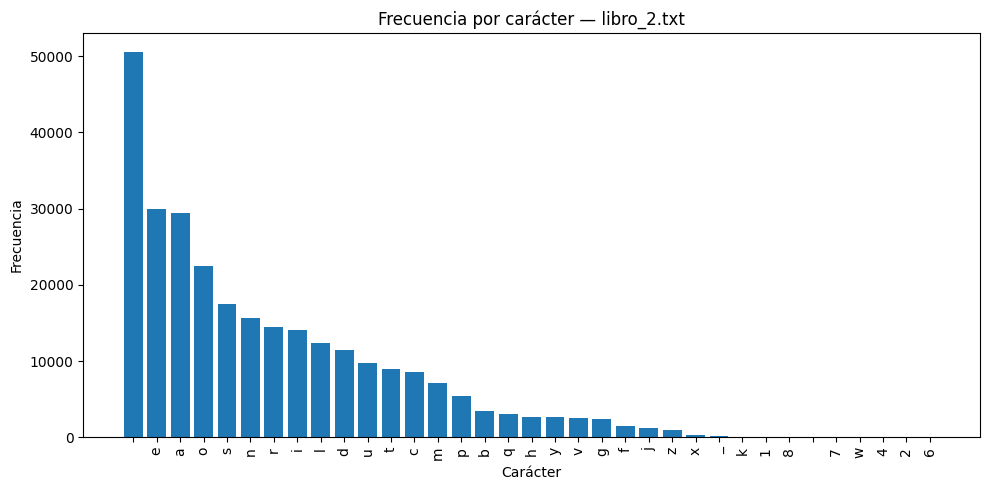

In [6]:
TOP_N = None  # None = todos los caracteres; o usa por ejemplo 80

def read_text_file(path: Path) -> str:
    """Lee un archivo intentando UTF-8 y, si falla, Latin-1."""
    try:
        return path.read_text(encoding="utf-8")
    except UnicodeDecodeError:
        return path.read_text(encoding="latin-1")

def char_frequencies(text: str) -> Counter:
    """Frecuencias por carácter."""
    return Counter(text)

def plot_histogram(counter: Counter, title: str, top_n: int | None = None):
    """Histograma (bar chart) ordenado por frecuencia desc."""
    items = counter.most_common(top_n)
    if not items:
        print(f"⚠️ Sin caracteres para graficar: {title}")
        return

    chars, counts = zip(*items)

    plt.figure(figsize=(max(10, len(chars) * 0.22), 5))
    plt.bar(range(len(chars)), counts)
    plt.xticks(range(len(chars)), chars, rotation=90)
    plt.title(title)
    plt.xlabel("Carácter")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

results = {}

for p in paths:
    if not p.exists():
        continue

    raw = read_text_file(p)
    clean = preprocess_text(raw)
    freq = char_frequencies(clean)

    results[p.name] = {
        "path": str(p),
        "n_chars_total": len(clean),
        "n_unique_chars": len(freq),
        "freq": freq,
    }

    print(f"\n=== {p.name} ===")
    print(f"Total caracteres (post-proc): {len(clean):,}")
    print(f"Únicos: {len(freq):,}")

    plot_histogram(freq, title=f"Frecuencia por carácter — {p.name}", top_n=TOP_N)


## Tabla resumen y export opcional

Genera un resumen por archivo y, si quieres, exporta las frecuencias a CSV por cada texto.


In [7]:
# Resumen por archivo
summary = pd.DataFrame([
    {
        "archivo": k,
        "path": v["path"],
        "n_chars_total": v["n_chars_total"],
        "n_unique_chars": v["n_unique_chars"],
    }
    for k, v in results.items()
]).sort_values("archivo")

summary


,archivo,path,n_chars_total,n_unique_chars
5,libro_1.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,297799,38
6,libro_2.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,278435,35
0,text_1.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,5151,19
1,text_2.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,3879,21
2,text_3.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,1677,20
3,text_4.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,3600,21
4,text_5.txt,/mnt/c/Users/Javier/Desktop/MCDI/2026_1_analis...,1647,22


In [8]:
# Export opcional: CSV de frecuencias por archivo (ordenado desc)
EXPORT_CSV = False
OUT_DIR = BASE_DIR / "output_char_freq"
OUT_DIR.mkdir(parents=True, exist_ok=True)

if EXPORT_CSV:
    for fname, v in results.items():
        freq = v["freq"]
        df = pd.DataFrame(freq.most_common(), columns=["char", "count"])
        out = OUT_DIR / f"{Path(fname).stem}_char_freq.csv"
        df.to_csv(out, index=False, encoding="utf-8")
        print("✅ Exportado:", out)
else:
    print("EXPORT_CSV=False (no se exportó nada).")


EXPORT_CSV=False (no se exportó nada).
